In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# --- Your Data ---
predictions = [0, 0, 1, 1, 0, 0, 2, 2, 1, 0]
ground_truth = [0, 1, 1, 1, 1, 0, 2, 2, 2, 2]
class_names = ['cat', 'dog', 'squirrel']

In [4]:
def advanced_classification_report(y_true, y_pred, class_names):
    """
    Generates and displays an advanced classification report for Jupyter.
    """
    print("--- Detailed Classification Report ---")
    report = classification_report(y_true, y_pred, target_names=class_names)
    print(report)

    # --- Automated Error Analysis ---
    cm = confusion_matrix(y_true, y_pred)
    np.fill_diagonal(cm, 0)
    max_error = cm.max()
    if max_error > 0:
        max_error_indices = np.unravel_index(np.argmax(cm, axis=None), cm.shape)
        true_class = class_names[max_error_indices[0]]
        pred_class = class_names[max_error_indices[1]]
        print(f"\n--- Top Prediction Error ---")
        print(f"The model's most frequent error was misclassifying '{true_class}' as '{pred_class}' ({max_error} times).\n")
    else:
        print("\n--- No prediction errors found! ---")

    # --- Plotting ---
    fig, axes = plt.subplots(1, 3, figsize=(22, 6))
    fig.suptitle('Advanced Model Performance Analysis', fontsize=16)

    # Plot 1: Raw Confusion Matrix
    cm_raw = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=axes[0],
                xticklabels=class_names, yticklabels=class_names)
    axes[0].set_title('Confusion Matrix (Raw Counts)')
    axes[0].set_xlabel('Predicted Label')
    axes[0].set_ylabel('Actual Label')

    # Plot 2: Normalized Confusion Matrix
    cm_normalized = cm_raw.astype('float') / cm_raw.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Greens', ax=axes[1],
                xticklabels=class_names, yticklabels=class_names)
    axes[1].set_title('Normalized Confusion Matrix (%)')
    axes[1].set_xlabel('Predicted Label')
    axes[1].set_ylabel('Actual Label')

    # Plot 3: Metrics Bar Chart
    report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    metrics = {cls: report_dict[cls] for cls in class_names}
    cls_metrics = {
        'Precision': [metrics[cls]['precision'] for cls in class_names],
        'Recall': [metrics[cls]['recall'] for cls in class_names],
        'F1-Score': [metrics[cls]['f1-score'] for cls in class_names]
    }
    x = np.arange(len(class_names))
    width = 0.25
    for i, (metric, values) in enumerate(cls_metrics.items()):
        axes[2].bar(x + i * width, values, width, label=metric)

    axes[2].set_ylabel('Scores')
    axes[2].set_title('Precision, Recall & F1-Score per Class')
    axes[2].set_xticks(x + width, class_names)
    axes[2].legend(loc='lower right')
    axes[2].set_ylim(0, 1.1)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

--- Detailed Classification Report ---
              precision    recall  f1-score   support

         cat       0.40      1.00      0.57         2
         dog       0.67      0.50      0.57         4
    squirrel       1.00      0.50      0.67         4

    accuracy                           0.60        10
   macro avg       0.69      0.67      0.60        10
weighted avg       0.75      0.60      0.61        10


--- Top Prediction Error ---
The model's most frequent error was misclassifying 'dog' as 'cat' (2 times).



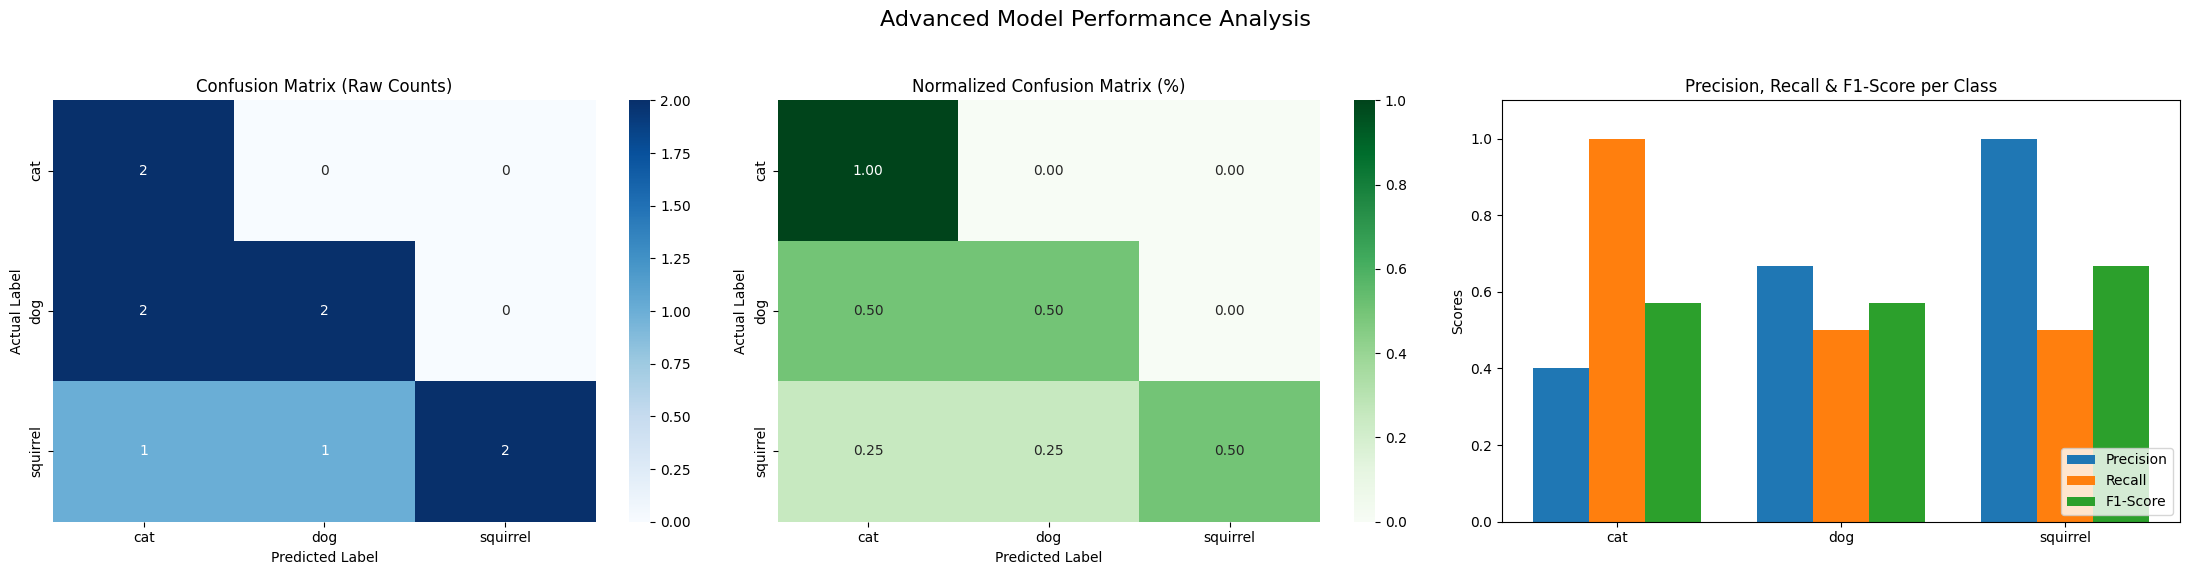

In [5]:
# --- Run the advanced analysis ---
advanced_classification_report(ground_truth, predictions, class_names)